# Demo 3: A general IVP solver

In this jupyter notebook, we will learn how to use the general IVP solver we wrote in `./project1/solver.py`.
Let's start from reproducing the results in `demo1` and `demo2`.


Before we start using the IVP solver, let's import the related packages first.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver             # your own solver
import solution.solver_sol as solver  # compare your results with solution
from scipy.integrate import solve_ivp as solver_scipy

# Note that if the path of your jupyter notebook is different from the path of the solver.py file, 
# you need to add the relative path of the solver.py file during the import, for example:

#import project1.solver as mysolver
#import project1.solution.solver_sol as solver

# Or, you can add the path of the solver.py file to the system path, for example:
# import sys
# sys.path.append('path_of_solver.py')


Now, let's start to reproduce `demo1` and `demo2`.
Set
* t0 = 0 sec and tmax = 20 sec
* time step dt = 0.01
* The spring constant `K` = 1
* The mass `M` = 1
* Initial condition: `x=1`, `v=0`.

In [1]:
# define the y' funciotn
def func(t,y,K,M):
    force = -K * y[0]     # F = - k X
    f = np.zeros(len(y))
    f[0] = y[1]           # y'[0] = v
    f[1] = force/M        # y'[1] = a = F/M
    return f
# Prepare the input arguments
t_span = np.linspace(0,20, 2001)
t_eval = t_span
y = np.array([1,0]) # initial condition
K = 1
M = 1
args = (K,M)



# use the IVP solver

sol = solver.solve_ivp(func,t_span,y, "RK4", t_eval, args)



In [2]:
# visualize the results




# Damped Oscillation

When there is a damping force ($F_{\rm damp}=-\lambda \dot{x}$), the equation of motion becomes,

$$
m\ddot{x} + \lambda \dot{x} + kx = 0
$$

### Exercise

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a damped oscillator (from t=0 to 20). IC: at t=0, K=M=1, A=1, $\phi= 0$,$\lambda=0.2$.
* Make plots of position(t), velocity(t), and total energy (t). Comapred your results with analytical solutions.

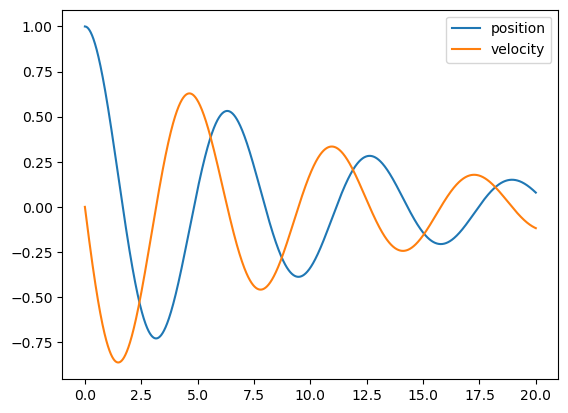

In [3]:
# TODO
def _damp(t,y,K,M,lam):
    f = np.zeros(len(y))
    f[0] = y[1]           # y'[0] = v
    force = -K * y[0] - lam*y[1]    # F = - k X
    f[1] = force/M        # y'[1] = a = F/M
    
    return f
t_span = np.linspace(0,20, 2001)
t_eval = t_span
y = np.array([1,0]) # initial condition
K = 1
M = 1
lam = 0.2
args = (K,M, lam)

sol = solver.solve_ivp(func_damp,t_span,y, "RK4", t_eval, args)


# visualize the results
plt.plot(t_eval, sol[0], label="position")
plt.plot(t_eval, sol[1], label="velocity")
plt.legend()
plt.show()





### Analytical Solutions

The analytical solution is

$$
x(t) = A e^{-\gamma t} \left[\cos(\omega t + \phi) \right],
$$

where $\omega = \sqrt{\gamma^2 -\omega_0^2}$ or $\omega=\sqrt{\omega_0^2-\gamma^2}$.

In [ ]:
# Compute the analytical solution







## Part 2

Now, let's explore the evolution of the three general cases:

* Underdamping: $\omega_0^2 > \gamma^2$
* Critical damping: $\omega_0^2 = \gamma^2$
* Overdamping: $\omega_0^2 < \gamma^2$

Vary $\lambda$, to the corresponding conditions:
* $\lambda = 0.2$ ($\omega_0^2 > \gamma^2$)
* $\lambda = 2$ ($\omega_0^2 = \gamma^2$)
* $\lambda = 2.4$ ($\omega_0^2 < \gamma^2$)

In [4]:
# TODO








# Forced Oscillation

* Use the IVP solver we developed. The only differences are the `func` and initial conditions.
* Modify the y' function (`func`) to simulate a forced oscillator (from t=0 to 100).
* Set the inital conditions: A=1, K=M=1, $\lambda=0.2$, $F_0=0.1$ and $\omega_f=0.8$.
* Make plots of position(t), velocity(t), and total energy(t).

In [5]:
# TODO







# Resonance

* Resonance will happen when $\omega_0 = \omega_f$ without damping.
* Modify your `demo3` but set $\lambda=0$ and $\omega_f=1$.
* Re-run your simulation with $\lambda=0.1$ and $0.01$.


In [6]:
# TODO







# Using `scipy`

Compare the results of our solver (`mysolver`) with the `solve_ivp` in `scipy`.

In [ ]:
# TODO







# Performance

We could mesure the performance of our solver and compare it with scipy.

In [7]:
#TODO







Which one is faster?